# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [11]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

# Exercises

# **Exercise12-1 Page No 161:**   The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [59]:
# Solution goes here
#  As per line 17, statsmodels to run a linear model of price as a function of time.
# I have referred the fit method in time series and linear regressioin
# Here Daily data passed, then fit the time series of daily prices

    
def RunQuadraticModel(daily): 
 
    daily['years2'] = daily.years**2
    # smf.ols - Linear Regression, also called Ordinary Least Squares (OLS) 
    # this comes from statsmodel
    model = smf.ols('ppg ~ years + years2', data=daily)
    results = model.fit()
    #returning the model and results
    return model, results

In [60]:
# Solution goes here
# I referred Line15 in Time Sereis  about dailies and mentioend in my write up
# calling the method of RunQuadraticModel

name = 'high'
daily = dailies[name]
model, results = RunQuadraticModel(daily)

#ols Regresion output will be displayed by using the summary method
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          4.57e-164
Time:                        18:42:13   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
years2         0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

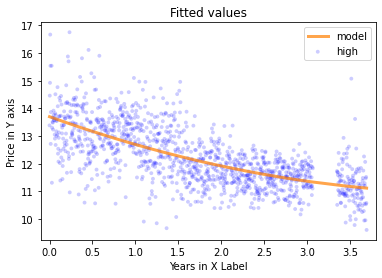

In [61]:
# Solution goes here
# ploting the fitted values
# I referred Line 45
PlotFittedValues(model, results, label=name)
thinkplot.Config(title='Fitted values',
                 xlabel='Years in X Label',
                 xlim=[-0.1, 3.8],
                 ylabel='Price in Y axis')

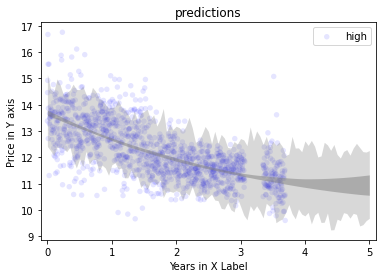

In [62]:
# Solution goes here
#NumPy used for linspace
# I referred Line 52

years = np.linspace(0, 5, 101)

#Scatter plots
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(title='predictions',
                 xlabel='Years in X Label',
                 xlim=[years[0]-0.1, years[-1]+0.1],
                 ylabel='Price in Y axis')

# **Exercise 12.2 Page Number 161 :** Write a definition for a class named `SerialCorrelationTest` that extends `HypothesisTest` from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [63]:
# Solution goes here
# Solution

class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag
    

In [64]:
# Solution goes here

# Testing the prices by using pvalue method

name = 'high'
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()

In [65]:
# Solution goes here

# verifying the acutal value vs p value
#I reffered line 55 with P value testing 


_, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)  



0.07570473767506261 0.001


In [66]:
# Solution goes here


# verifying the acutal value vs p value by using n residuals 
#I reffered line 55 with P value testing 

_, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)


0.05607308161289916 0.043


# Observation 

p values as 0.001 & p values as 0.043 which shows that  statistically highly significant.

**Worked example:** There are several ways to extend the EWMA model to generate predictions. One of the simplest is something like this:

1. Compute the EWMA of the time series and use the last point as an intercept, `inter`.

2. Compute the EWMA of differences between successive elements in the time series and use the last point as a slope, `slope`.

3. To predict values at future times, compute `inter + slope * dt`, where `dt` is the difference between the time of the prediction and the time of the last observation.


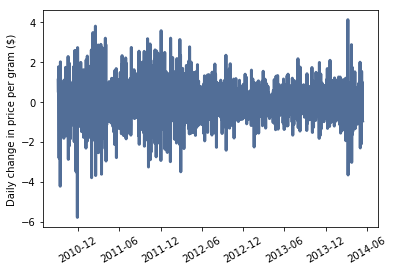

In [51]:
name = 'high'
daily = dailies[name]

filled = FillMissing(daily)
diffs = filled.ppg.diff()

thinkplot.plot(diffs)
plt.xticks(rotation=30)
thinkplot.Config(ylabel='Daily change in price per gram ($)')

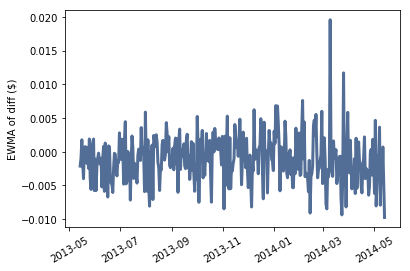

In [52]:
filled['slope'] = diffs.ewm(span=365).mean()
thinkplot.plot(filled.slope[-365:])
plt.xticks(rotation=30)
thinkplot.Config(ylabel='EWMA of diff ($)')

In [53]:
# extract the last inter and the mean of the last 30 slopes
start = filled.index[-1]
inter = filled.ewma[-1]
slope = filled.slope[-30:].mean()

start, inter, slope

(Timestamp('2014-05-13 00:00:00', freq='D'),
 10.92951876545549,
 -0.00262422491642447)

In [54]:
# reindex the DataFrame, adding a year to the end
dates = pd.date_range(filled.index.min(), 
                      filled.index.max() + np.timedelta64(365, 'D'))
predicted = filled.reindex(dates)

In [55]:
# generate predicted values and add them to the end
predicted['date'] = predicted.index
one_day = np.timedelta64(1, 'D')
predicted['days'] = (predicted.date - start) / one_day
predict = inter + slope * predicted.days
predicted.ewma.fillna(predict, inplace=True)

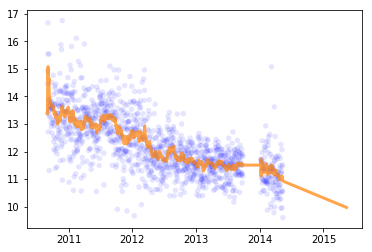

In [56]:
# plot the actual values and predictions
thinkplot.Scatter(daily.ppg, alpha=0.1, label=name)
thinkplot.Plot(predicted.ewma, color='#ff7f00')

As an exercise, run this analysis again for the other quality categories.